# 1 LeNet

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt

from datas import *
from modelDefine import LeNet, MyNet

X_train, X_test, Y_train, Y_test = get_data("./datas")
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1000, 1, 32, 32), (1000, 1, 32, 32), (1000,), (1000,))

In [2]:
#torch.manual_seed(29508046070500)
torch.manual_seed(36133024342000)

In [3]:
# print the type of labels and their counts

categories, count = np.unique(Y_train, return_counts=True)
categories, count

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100], dtype=int64))

In [4]:
# transfer the numpy arrays to pytorch tensors

X_train = torch.from_numpy(X_train)
X_test = torch.from_numpy(X_test)
Y_train = torch.from_numpy(Y_train)
Y_test = torch.from_numpy(Y_test)

In [5]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

(torch.Size([1000, 1, 32, 32]),
 torch.Size([1000, 1, 32, 32]),
 torch.Size([1000]),
 torch.Size([1000]))

In [6]:
# create the dataset

trainset = TensorDataset(X_train, Y_train)
testset = TensorDataset(X_test, Y_test)

In [7]:
# create the dataloader

batchsize = 32
dataloader = DataLoader(trainset, batchsize, shuffle=True)

In [8]:
# create an instance of LeNet, which defined in modelDefine.py

model = LeNet()

In [9]:
#  optimzer: Adam
#  lossfunction: CrossEntropyLoss

optimizer = Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

epoch_list = []
loss_list_train = []
accuracy_list_train = []

loss_list_test = []
accuracy_list_test = []

In [10]:
# train and test

num_epochs = 500

for epoch in range(num_epochs):
    # train
    model.train()
    running_loss = 0
    correct = 0
    
    for features, labels in dataloader:
        optimizer.zero_grad()
        
        outputs = model(features)
        loss = criterion(outputs, labels)
        loss.backward()
        
        optimizer.step()
        
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()
        running_loss += loss.item()
    
    running_loss /= len(dataloader)
    accuracy = correct / Y_train.shape[0]
    epoch_list.append(epoch+1)
    loss_list_train.append(running_loss)
    accuracy_list_train.append(accuracy)
    
    if epoch % 10 == 9:
        print(f"Epoch [{epoch+1}/{num_epochs}],\tLoss: {running_loss:.4f},\tAccuracy: {accuracy:.2f}")
    
    
    
    # test
    model.eval()
    
    outputs = model(X_test)
    loss = criterion(outputs, Y_test)
    _, predicted = torch.max(outputs.data, 1)
    accuracy = (predicted == Y_test).sum().item() / Y_test.shape[0]
    
    loss_list_test.append(loss.item())
    accuracy_list_test.append(accuracy)

Epoch [10/500],	Loss: 2.0989,	Accuracy: 0.61
Epoch [20/500],	Loss: 2.0882,	Accuracy: 0.67
Epoch [30/500],	Loss: 2.0771,	Accuracy: 0.69
Epoch [40/500],	Loss: 2.0832,	Accuracy: 0.70
Epoch [50/500],	Loss: 2.0615,	Accuracy: 0.74
Epoch [60/500],	Loss: 2.0667,	Accuracy: 0.75
Epoch [70/500],	Loss: 2.0649,	Accuracy: 0.75
Epoch [80/500],	Loss: 2.0577,	Accuracy: 0.76
Epoch [90/500],	Loss: 2.0569,	Accuracy: 0.76
Epoch [100/500],	Loss: 2.0612,	Accuracy: 0.74
Epoch [110/500],	Loss: 2.0530,	Accuracy: 0.77
Epoch [120/500],	Loss: 2.0604,	Accuracy: 0.78
Epoch [130/500],	Loss: 2.0654,	Accuracy: 0.76
Epoch [140/500],	Loss: 2.0481,	Accuracy: 0.78
Epoch [150/500],	Loss: 2.0471,	Accuracy: 0.79
Epoch [160/500],	Loss: 2.0578,	Accuracy: 0.78
Epoch [170/500],	Loss: 2.0462,	Accuracy: 0.78
Epoch [180/500],	Loss: 2.0641,	Accuracy: 0.79
Epoch [190/500],	Loss: 2.0540,	Accuracy: 0.80
Epoch [200/500],	Loss: 2.0461,	Accuracy: 0.81
Epoch [210/500],	Loss: 2.0514,	Accuracy: 0.81
Epoch [220/500],	Loss: 2.0450,	Accuracy: 0.

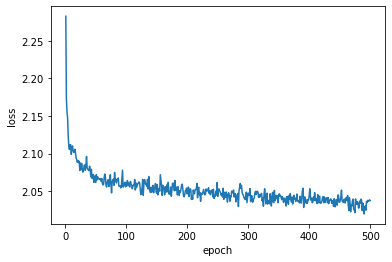

In [11]:
# loss curve of train set

plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epoch_list, loss_list_train)

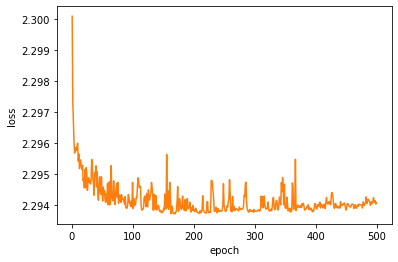

In [12]:
# loss curve of test set

plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epoch_list, loss_list_test, color='C1')

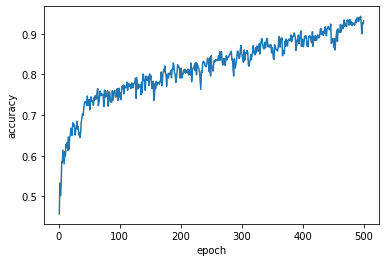

In [13]:
# accuracy curve of train set

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(epoch_list, accuracy_list_train)

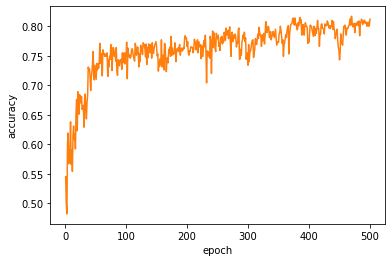

In [14]:
# accuracy curve of set set

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(epoch_list, accuracy_list_test, color='C1')

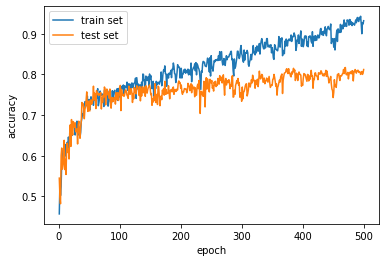

In [15]:
# accuracy comparation between train set and test set

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(epoch_list, accuracy_list_train, label = 'train set')
plt.plot(epoch_list, accuracy_list_test, label = 'test set')
plt.legend()

In [16]:
print(f"The best accuracy of train set: {np.max(accuracy_list_train)}\tAt epoch: {np.argmax(accuracy_list_train)}")
print(f"The best accuracy of test set: {np.max(accuracy_list_test)}\tAt epoch: {np.argmax(accuracy_list_test)}" )
print(f"The accuracy of train set of ultimate model: {accuracy_list_train[-1]}")
print(f"The accuracy of test set of ultimate model: {accuracy_list_test[-1]}")

The best accuracy of train set: 0.943	At epoch: 494
The best accuracy of test set: 0.817	At epoch: 469
The accuracy of train set of ultimate model: 0.932
The accuracy of test set of ultimate model: 0.812


In [17]:
torch.save(model, './models/lenet.pth')

# 2 以LeNet为基础设计一个3-7层的浅层神经网络

In [18]:
# create an instance of MyNet, which defined in modelDefine.py

mymodel = MyNet()

In [19]:
#  optimzer: Adam
#  lossfunction: CrossEntropyLoss

optimizer = Adam(mymodel.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

epoch_list = []
loss_list_train = []
accuracy_list_train = []

loss_list_test = []
accuracy_list_test = []

In [20]:
mymodel.train()
num_epochs = 450

for epoch in range(num_epochs):
    # train
    running_loss = 0
    correct = 0
    
    for features, labels in dataloader:
        optimizer.zero_grad()
        
        outputs = mymodel(features)
        loss = criterion(outputs, labels)
        loss.backward()
        
        optimizer.step()
        
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()
        running_loss += loss.item()
    
    running_loss /= len(dataloader)
    accuracy = correct / X_train.shape[0]
    epoch_list.append(epoch+1)
    loss_list_train.append(running_loss)
    accuracy_list_train.append(accuracy)
    
    if epoch % 10 == 9:
        print(f"Epoch [{epoch+1}/{num_epochs}],\tLoss: {running_loss:.4f},\tAccuracy: {accuracy:.2f}")
    
    # test
    mymodel.eval()
    
    outputs = mymodel(X_test)
    loss = criterion(outputs, Y_test)
    _, predicted = torch.max(outputs.data, 1)
    accuracy = (predicted == Y_test).sum().item() / Y_test.shape[0]
    
    loss_list_test.append(loss.item())
    accuracy_list_test.append(accuracy)

Epoch [10/450],	Loss: 2.0939,	Accuracy: 0.65
Epoch [20/450],	Loss: 2.0835,	Accuracy: 0.68
Epoch [30/450],	Loss: 2.0699,	Accuracy: 0.70
Epoch [40/450],	Loss: 2.0674,	Accuracy: 0.71
Epoch [50/450],	Loss: 2.0644,	Accuracy: 0.74
Epoch [60/450],	Loss: 2.0591,	Accuracy: 0.75
Epoch [70/450],	Loss: 2.0688,	Accuracy: 0.74
Epoch [80/450],	Loss: 2.0645,	Accuracy: 0.75
Epoch [90/450],	Loss: 2.0450,	Accuracy: 0.78
Epoch [100/450],	Loss: 2.0552,	Accuracy: 0.79
Epoch [110/450],	Loss: 2.0394,	Accuracy: 0.83
Epoch [120/450],	Loss: 2.0522,	Accuracy: 0.79
Epoch [130/450],	Loss: 2.0519,	Accuracy: 0.81
Epoch [140/450],	Loss: 2.0353,	Accuracy: 0.84
Epoch [150/450],	Loss: 2.0408,	Accuracy: 0.84
Epoch [160/450],	Loss: 2.0394,	Accuracy: 0.87
Epoch [170/450],	Loss: 2.0398,	Accuracy: 0.83
Epoch [180/450],	Loss: 2.0420,	Accuracy: 0.84
Epoch [190/450],	Loss: 2.0350,	Accuracy: 0.87
Epoch [200/450],	Loss: 2.0424,	Accuracy: 0.87
Epoch [210/450],	Loss: 2.0298,	Accuracy: 0.87
Epoch [220/450],	Loss: 2.0376,	Accuracy: 0.

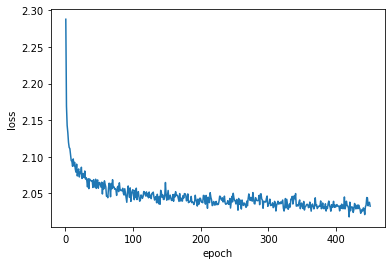

In [21]:
# loss curve of train set

plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epoch_list, loss_list_train)

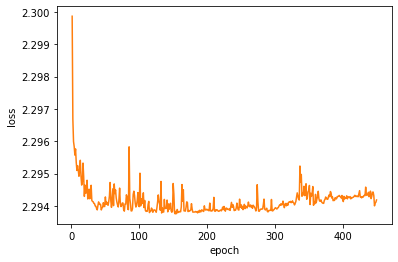

In [22]:
# loss curve of test set

plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epoch_list, loss_list_test, color='C1')

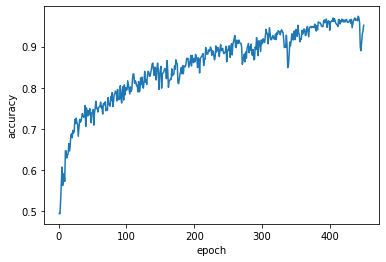

In [23]:
# accuracy curve of train set

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(epoch_list, accuracy_list_train)

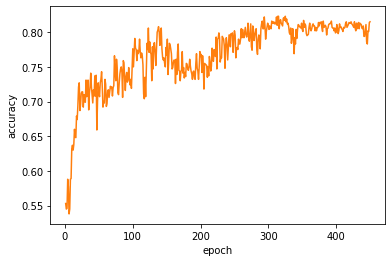

In [24]:
# accuracy curve of set set

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(epoch_list, accuracy_list_test, color='C1')

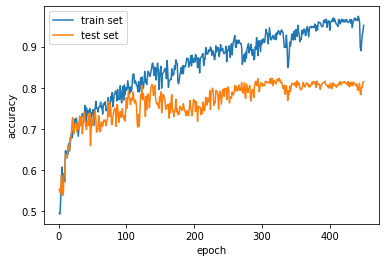

In [25]:
# accuracy comparation between train set and test set

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(epoch_list, accuracy_list_train, label = 'train set')
plt.plot(epoch_list, accuracy_list_test, label = 'test set')
plt.legend()

In [26]:
mymodel.eval()

outputs = mymodel(X_test)
_, predicted = torch.max(outputs.data, 1)
accuracy = (predicted == Y_test).sum().item() / 1000

print(accuracy)

0.815


In [27]:
print(f"The best accuracy of train set: {np.max(accuracy_list_train)}\tAt epoch: {np.argmax(accuracy_list_train)}")
print(f"The best accuracy of test set: {np.max(accuracy_list_test)}\tAt epoch: {np.argmax(accuracy_list_test)}" )
print(f"The accuracy of train set of ultimate model: {accuracy_list_train[-1]}")
print(f"The accuracy of test set of ultimate model: {accuracy_list_test[-1]}")

The best accuracy of train set: 0.974	At epoch: 441
The best accuracy of test set: 0.823	At epoch: 313
The accuracy of train set of ultimate model: 0.952
The accuracy of test set of ultimate model: 0.815


In [28]:
torch.save(mymodel, './models/mynet.pth')

In [29]:
print(torch.initial_seed())

36133024342000
